<h2> Testing Bayesian Analysis </h2>
The goal here is to try to understand the effects of different prior choices in Bayesian analysis, and to try to get an understanding of the comparative power of Bayesian methods vs. standard methods of analysis. I am going to be thinking in terms of A/B testing with test and control populations.<br>
<br>
In my previous job we had some pretty extreme data. What we cared about was revenue. log(revenue) wasn't exactly normal; it was more spread out. Bassically it was generalized Gaussian with a beta > 1.<br>
<br>
Standard tests were pretty well useless at identifying any kind of signal. I want to see if Bayesian methiods can do better. I also want to test the difference between using a prior that is fairly well fitted to the actual data vs. a prior that is sensible for a hurdle model but with boilerplate parameters. <br>
<br>
This particular notebook is for exploring the distibution and for finding a distribution that looks like the data at my old company.

In [1]:
# Importing Things #
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from scipy.stats import gennorm
from scipy.stats import gamma
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm

In [2]:
# Control parameters
numCases = 25000
gGaussianBeta = 3
gGaussMean = 3
gGaussSpread = 2.5

In [3]:
cases =  gennorm.rvs(gGaussianBeta, size=numCases)
data1 = pd.DataFrame(data=cases,columns=['cases'])
# Adjust the data to get typical revenue numbers
data1['cases']=data1['cases']*gGaussSpread + gGaussMean

Text(0.5, 1.0, 'Generalized Gaussian Distribution')

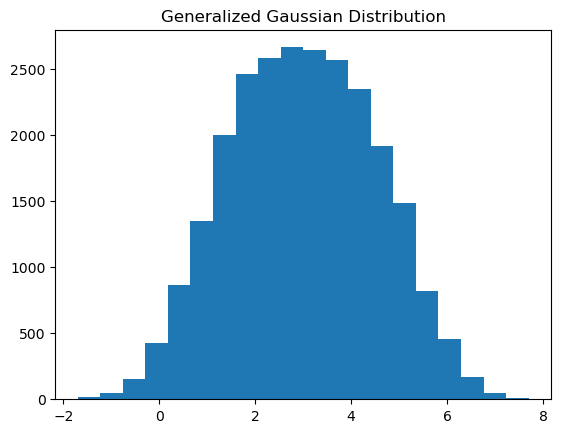

In [4]:
plt.hist(data1['cases'],bins=20)
plt.title("Generalized Gaussian Distribution")

In [5]:
# Apply exp function to get to spending #
data1['spending'] = data1.apply(lambda x:m.exp(x['cases']),axis=1)

Text(0.5, 1.0, 'Histogram of Spending')

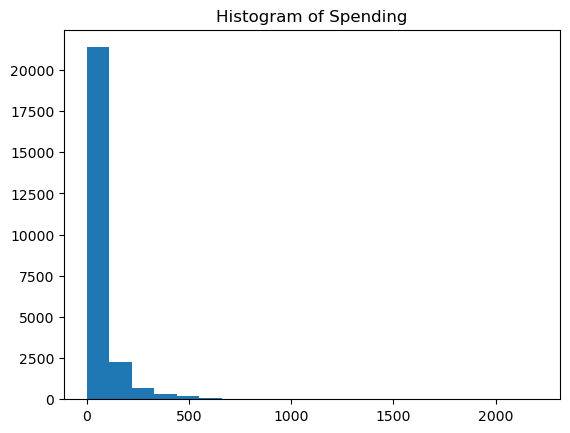

In [6]:
plt.hist(data1['spending'],bins=20)
plt.title("Histogram of Spending")

In [7]:
#Note that these variables are also used in the PyMC work
m_data = data1['spending'].mean()
v_data = data1['spending'].var()
s_data = m.sqrt(v_data)
max_data = data1['spending'].var()
print("Mean of Spending: ", m_data)
print("Variance of Spending: ", v_data)
print("Standard Deviation of Spending: ", s_data)
print("Max of Spending: ",max_data)

Mean of Spending:  57.67849537756974
Variance of Spending:  11381.783585147448
Standard Deviation of Spending:  106.68544223626506
Max of Spending:  11381.783585147448


<h3> Model the above as a Gamma Distibution</h3>

In [8]:
# Gamma Parameters #
alpha = (m_data*m_data)/(v_data)
theta = v_data/m_data
scale = 1/theta

In [9]:
print("Alpha: ", alpha)
print("Theta: ", theta)
print("Scale:", scale)

Alpha:  0.2922923990016487
Theta:  197.33149262374215
Scale: 0.005067614837874509


In [10]:
gamma_values = gamma.rvs(a=alpha,scale=theta,size=numCases)

In [11]:
data1['gamma_values'] = gamma_values

Text(0.5, 1.0, 'Histogram for the Corresponding Gamma Distibution')

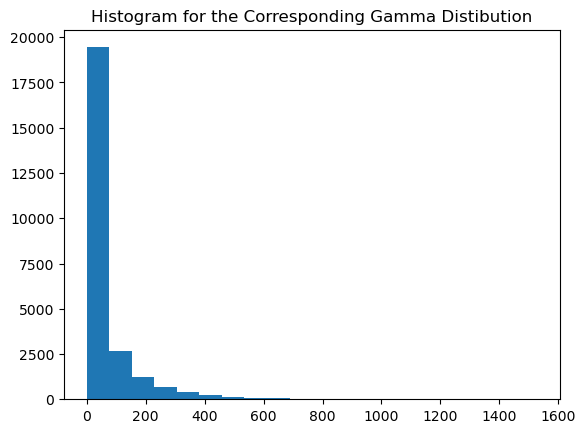

In [12]:
plt.hist(data1['gamma_values'],bins=20)
plt.title("Histogram for the Corresponding Gamma Distibution")

Text(0.5, 1.0, 'Histogram for PyMC Gamma Function')

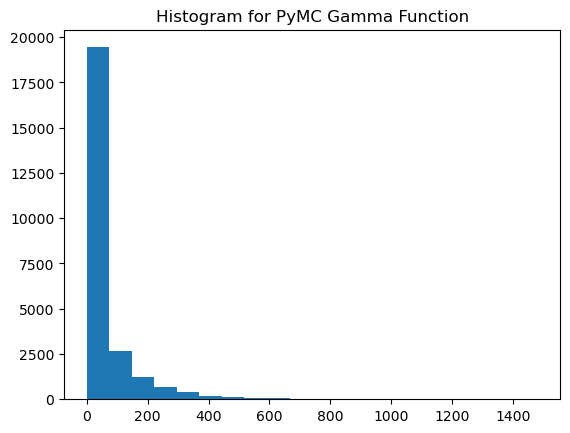

In [13]:
# Match up with the PyMC Gamma distribution to make sure I have the parameters right #
x = pm.Gamma.dist(alpha=alpha, beta=scale)
x_draws = pm.draw(x, draws=numCases, random_seed=1)
plt.hist(x_draws,bins=20)
plt.title("Histogram for PyMC Gamma Function")